## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

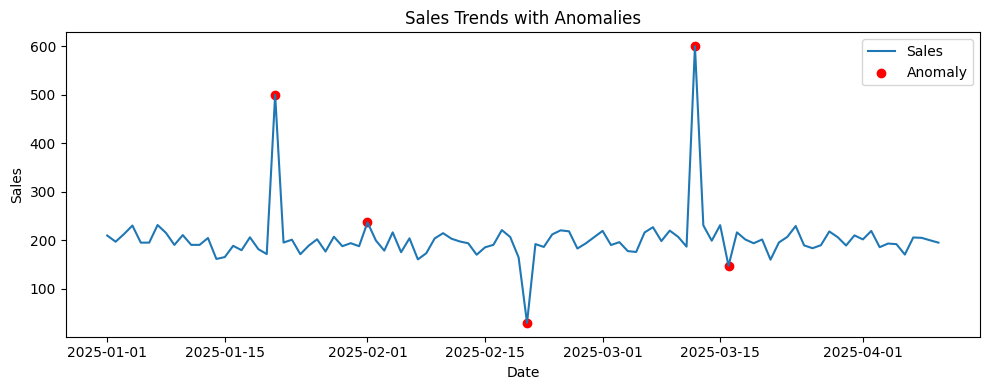

Anomalies flagged on these dates:
         date       sales
20 2025-01-21  500.000000
31 2025-02-01  237.045564
50 2025-02-20   30.000000
70 2025-03-12  600.000000
74 2025-03-16  147.605098


In [8]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate mock sales data (trend + some outliers)
np.random.seed(42)
days = pd.date_range(start="2025-01-01", periods=100)
sales = np.random.normal(loc=200, scale=20, size=100)
sales[[20, 50, 70]] = [500, 30, 600]  # Outliers

df = pd.DataFrame({"date": days, "sales": sales})

# Train an anomaly detection model
model = IsolationForest(contamination=0.05)
df["anomaly"] = model.fit_predict(df[["sales"]])
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})  # 1 = anomaly

# Plot results
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["sales"], label="Sales")
plt.scatter(df[df["anomaly"] == 1]["date"], df[df["anomaly"] == 1]["sales"], color="red", label="Anomaly")
plt.title("Sales Trends with Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

print("Anomalies flagged on these dates:")
print(df[df["anomaly"] == 1][["date", "sales"]])


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Sample "duplicated" names with small variations
names = ["Alice Johnson", "A. Johnson", "Bob Smith", "B. Smith", "Robert Smith", "Alice J.", "John Doe", "Jon Doe"]

# Vectorize names using TF-IDF
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
X = vectorizer.fit_transform(names)

# Cluster similar names
clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = clustering.fit_predict(X)

# Show clusters
df_names = pd.DataFrame({"name": names, "cluster": labels})
print("Detected clusters (possible duplicates):")
print(df_names.sort_values(by="cluster"))


Detected clusters (possible duplicates):
            name  cluster
4   Robert Smith       -1
0  Alice Johnson        0
1     A. Johnson        0
5       Alice J.        0
2      Bob Smith        1
3       B. Smith        1
6       John Doe        2
7        Jon Doe        2


**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [10]:
# write your code from here

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Mock data: rows of features with a label if the record is valid or has an issue
data = {
    "age": [25, 30, 150, None, 45, 28, 130, 50, 38, None],
    "income": [50000, 62000, 100000, 40000, None, 58000, 20000, 45000, 61000, None],
    "missing_fields": [0, 0, 0, 1, 1, 0, 0, 0, 0, 2],
    "is_valid": [1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Fill missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["income"].fillna(df["income"].median(), inplace=True)

X = df[["age", "income", "missing_fields"]]
y = df["is_valid"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
try:
    df["age"].fillna(df["age"].median(), inplace=True)
except Exception as e:
    print(f"Error handling missing age: {e}")


In [6]:
assert df.isnull().sum().sum() == 0, "Data still contains missing values"


In [7]:
def validate_data(df):
    """Validates if all expected columns exist and checks for missing values."""
    required_cols = ["age", "income", "missing_fields"]
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
